In [1]:
import os

def change_dir_in_hipergator():
    # this env var is set on hipergator (SLURM is the job scheduler there)
    if os.getenv("SLURM_JOB_ID", None):
        target_dir = "diff_fam_social_memory_ephys"
        current = os.getcwd()

        while True:
            parent = os.path.dirname(current)
            # If we've reached the root directory without finding the target
            if parent == current:
                raise FileNotFoundError(f"Could not find parent directory '{target_dir}'")

            # Check if the target directory is the current parent's name
            if os.path.basename(parent) == target_dir:
                os.chdir(parent)
                return parent

            current = parent

# Usage
try:
    new_path = change_dir_in_hipergator()
    print(f"Successfully changed to directory: {new_path}")
except FileNotFoundError as e:
    print(e)

Successfully changed to directory: None


In [ ]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import os
from scipy.stats import sem
from matplotlib.lines import Line2D
import sys
import pickle
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.spike_recording as recording
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.pca_trajectories as pca_trajectories

import pickle
import seaborn as sns
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

cups_colleciton = unpickle_this("pilot2/cups_phase4/cups_collection.pkl")
cups2_collection = unpickle_this("pilot2/cups_phase4/cups_r2_collection.pkl")

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [15]:

# cups_collection = collection.SpikeCollection(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Cups (phase 4)\sorted")
# cups2_collection = collection.SpikeCollection(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Cups_Round2 (phase 8)\sorted")
# all_cups_collection = collection.SpikeCollection(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Cups (phase 4)\sorted")

# behavior_dict = unpickle_this(r"pilot2/cups_phase4/cups_behavior_dicts.pkl")
# behavior_dict2 = unpickle_this(r"pilot2/cups_phase4/cups_r2_behavior_dicts.pkl")

# for recording in cups_collection.recordings:
#     subject = int(recording.name.split("_")[0])/10
#     recording.event_dict = behavior_dict[str(subject)]
#     recording.subject = subject

# for recording in cups2_collection.recordings:
#     print(recording.name)
#     subject = int(recording.name.split("_")[0])/10
#     print(subject)
#     recording.event_dict = behavior_dict2[str(subject)]
#     recording.subject = subject

# for recording in all_cups_collection.recordings:
#     subject = int(recording.name.split("_")[0])/10
#     recording.event_dict = behavior_dict[str(subject)]
#     recording.subject = subject


# for recording in cups2_collection.recordings:
#     all_cups_collection.recordings.append(recording)

# cups_collection.analyze(timebin = 100, ignore_freq = 0.5, smoothing_window = 500)
# cups2_collection.analyze(timebin = 100, ignore_freq = 0.5, smoothing_window = 500)
# all_cups_collection.analyze(timebin = 100, ignore_freq = 0.5, smoothing_window = 500)

# pickle_this(cups_collection, "pilot2/cups_phase4/cups_collection.pkl")
# pickle_this(cups2_collection, "pilot2/cups_phase4/cups_r2_collection.pkl") 

In [14]:
print(cups_collection)

print(cups2_collection)

SpikeCollection Summary:
  Number of Recordings: 8
  Total Good Units: 120
  Total Analyzed Units: 109
  Average Number of Good Units: 15.00
  Average Number of Events per Event Type: {'cup 1': 23.5, 'cup 2': 25.375, 'cup 3': 32.0, 'cup 4': 29.625, 'acquisition': 29.375, 'empty acquisition': 63.25, 'familiar': 11.25, 'familiar_baseline': 25.75, 'cagemate_baseline': 25.5, 'novel_baseline': 30.25, 'empty_baseline': 29.0, 'novel': 19.375, 'cagemate': 32.0, 'empty': 12.375, 'pink': 24.375, 'orange': 29.875, 'blue': 26.625, 'green': 35.125}
  Number of Unique Subjects: 8


SpikeCollection Summary:
  Number of Recordings: 4
  Total Good Units: 56
  Total Analyzed Units: 49
  Average Number of Good Units: 14.00
  Average Number of Events per Event Type: {'cup 1': 20.25, 'cup 2': 24.75, 'cup 3': 24.0, 'cup 4': 26.25, 'acquisition': 26.0, 'empty acquisition': 46.25, 'familiar': 14.0, 'novel': 16.5, 'cagemate': 23.5, 'empty': 10.75, 'cagemate_baseline': 20.0, 'familiar_baseline': 27.5, 'novel_ba

In [49]:
events = ['cagemate', 'familiar', 'novel', 'empty']

Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


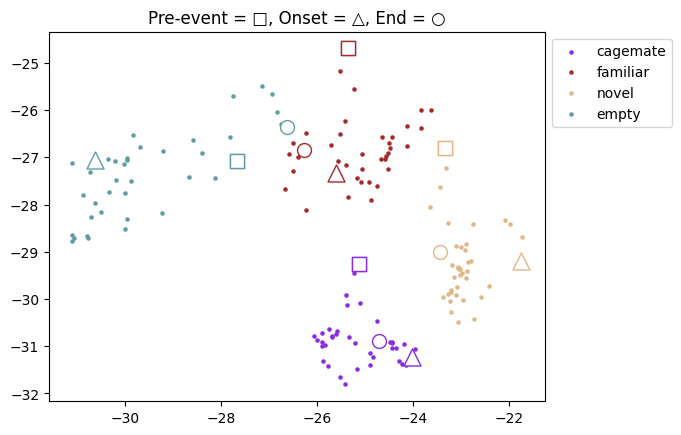

PCA Result with:
Events: cagemate, familiar, novel, empty
Timebins per event: 40.0
Total neurons: 45
Number of recordings: 3
Number of Pcs needed to explain 90% of variance 8


In [13]:
pca2result = pca_trajectories.avg_trajectories_pca(cups2_collection, 3, 1, min_neurons = 5, events = events)
pca2result
print(str(pca2result))

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


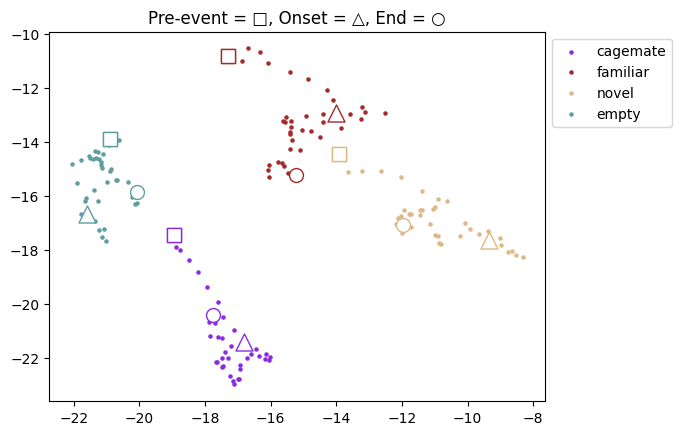

PCA Result with:
Events: cagemate, familiar, novel, empty
Timebins per event: 40.0
Total neurons: 109
Number of recordings: 8
Number of Pcs needed to explain 90% of variance 12


In [79]:
pca_result = pca_trajectories.avg_trajectories_pca(cups_collection, 3, 1, min_neurons = 5, events = events)
print(str(pca_result))

In [15]:
condition_dict = {'round 1': [], 'round 2': []}
for recording in all_cups_collection.recordings:
    if 'p8' in recording.name:
        condition_dict['round 2'].append(recording.name)
    if 'p4' in recording.name:
        condition_dict['round 1'].append(recording.name)
print(condition_dict)

{'round 1': ['11_cups_p4_merged.rec', '13_cups_p4_merged.rec', '21_cups_p4_merged.rec', '22_cups_p4_merged.rec', '24_cups_p4_merged.rec', '32_cups_p4_merged.rec', '41_cups_p4_merged.rec', '44_cups_p4_merged.rec'], 'round 2': ['22_cups_p8_merged.rec', '32_cups_p8_merged.rec', '41_cups_p8_merged.rec', '44_cups_p8_merged.rec']}


Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


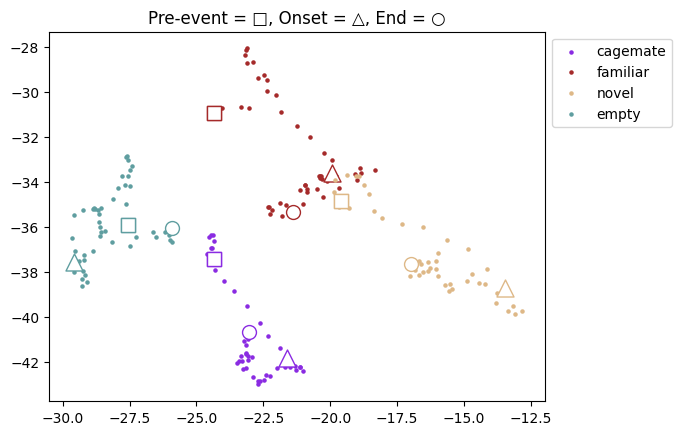

                Recording  Number of Neurons  Number of cagemate events  \
0   11_cups_p4_merged.rec                 21                         20   
1   41_cups_p8_merged.rec                 19                         25   
2   41_cups_p4_merged.rec                 18                         37   
3   22_cups_p4_merged.rec                 16                         54   
4   21_cups_p4_merged.rec                 15                         49   
5   22_cups_p8_merged.rec                 15                         28   
6   13_cups_p4_merged.rec                 12                         27   
7   44_cups_p8_merged.rec                 11                         18   
8   24_cups_p4_merged.rec                 10                         24   
9   44_cups_p4_merged.rec                 10                         25   
10  32_cups_p4_merged.rec                  7                         20   

    Number of familiar events  Number of novel events  Number of empty events  
0                  

In [ ]:
pcar = pca_trajectories.avg_trajectories_pca(all_cups_collection,  3, 2, min_neurons = 5, events = ['cagemate', 'familiar', 'novel','empty'])


Excluding 32_cups_p8_merged.rec with 4 neurons


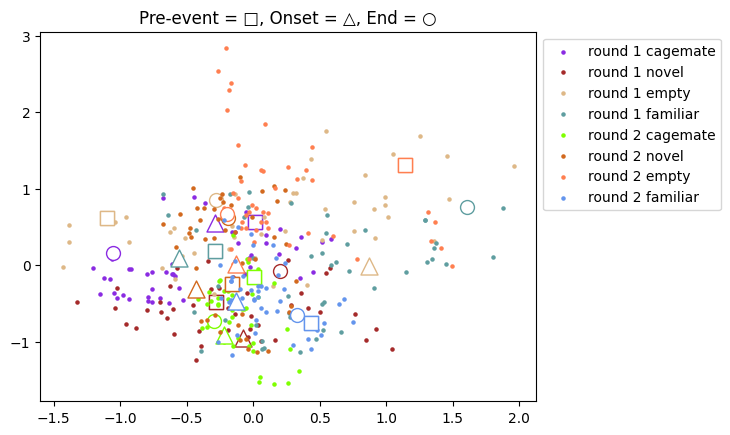

                Recording  Number of Neurons  Number of cagemate events  \
0   11_cups_p4_merged.rec                 21                         20   
1   41_cups_p8_merged.rec                 19                         25   
2   41_cups_p4_merged.rec                 18                         37   
3   22_cups_p4_merged.rec                 16                         54   
4   21_cups_p4_merged.rec                 15                         49   
5   22_cups_p8_merged.rec                 15                         28   
6   13_cups_p4_merged.rec                 12                         27   
7   44_cups_p8_merged.rec                 11                         18   
8   24_cups_p4_merged.rec                 10                         24   
9   44_cups_p4_merged.rec                 10                         25   
10  32_cups_p4_merged.rec                  7                         20   

    Number of novel events  Number of empty events  Number of familiar events  
0                  

In [17]:
pca_trajectories.condition_pca(all_cups_collection, condition_dict, 3, 2, min_neurons = 5, events = ['cagemate', 'novel', 'empty', 'familiar'])

In [18]:
def plot_pca_results_3d(pca_result, title, colors, azim, elev, save = False):
    event_lengths = int(
            (pca_result.event_length + pca_result.pre_window + pca_result.post_window) * 1000 / pca_result.timebin
        )
    event_end = int((pca_result.event_length + pca_result.pre_window) * 1000 / pca_result.timebin)
    pre_window = pca_result.pre_window * 1000 / pca_result.timebin
    post_window = pca_result.post_window * 1000 / pca_result.timebin
    pc_var = pca_result.explained_variance
    PCA_key = pca_result.labels
    PCA_matrix = pca_result.transformed_data
    col_counter = 0
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")
    #plt.subplots_adjust(left=0.3, right=0.99, bottom=0.1, top=0.9)
    for i in range(0, len(PCA_key), event_lengths):
        event_label = PCA_key[i]
        onset = int(i + pre_window - 1)
        end = int(i + event_end - 1)
        post = int(i + event_lengths - 1)
        ax.plot3D(
            PCA_matrix[i : i + event_lengths, 0],
            PCA_matrix[i : i + event_lengths, 1],
            PCA_matrix[i : i + event_lengths, 2],
            label=event_label,
            color=colors[col_counter],
            linewidth = 5,
            alpha = 0.8
        )
        ax.scatter(
            PCA_matrix[i, 0],
            PCA_matrix[i, 1],
            PCA_matrix[i, 2],
            marker="s",
            s=100,
            c="w",
            edgecolors=colors[col_counter],
        )
        ax.scatter(
            PCA_matrix[onset, 0],
            PCA_matrix[onset, 1],
            PCA_matrix[onset, 2],
            marker="^",
            s=300,
            c="w",
            edgecolors=colors[col_counter],
        )
        ax.scatter(
            PCA_matrix[end, 0],
            PCA_matrix[end, 1],
            PCA_matrix[end, 2],
            marker="o",
            s=200,
            c="w",
            edgecolors=colors[col_counter],
        )
        if post_window != 0:
            print("woo")
            ax.scatter(
                PCA_matrix[post, 0],
                PCA_matrix[post, 1],
                PCA_matrix[post, 2],
                marker="D",
                s=200,
                c="w",
                edgecolors=colors[col_counter],
            )
        col_counter += 1
    ax.legend(loc="upper left", bbox_to_anchor=(.9,1), frameon = False, fontsize = 14)
    # ax.set_xlim(-20, 45)
    # ax.set_ylim(-5, 25)
    # ax.set_zlim(-20, 30)
    ax.view_init(azim = azim, elev =elev)
    ax.set_title(f"{title}", fontsize = 24, y = 1)
    ax.set_xlabel(f"PC1 ({pc_var[0]*100:.1f}% variance)", fontsize = 16, labelpad = -10)
    ax.set_ylabel(f"PC2 ({pc_var[1]*100:.1f}% variance)", fontsize = 16, labelpad = -10)
    ax.set_zlabel(f"PC3 ({pc_var[2]*100:.1f}% variance)", fontsize = 16, labelpad = -10)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.yaxis.pane.set_alpha(0.9)
    ax.xaxis.pane.set_alpha(0.9)
    ax.zaxis.pane.set_alpha(0.9)
    plt.tight_layout()
    if save:
        plt.savefig(f'{title}.png', dpi = 600, transparent = True,bbox_inches='tight' )
    plt.show()


def plot_pca_results_2d(pca_result, title, colors, legend_spot, save=False):
    event_lengths = int(
        (pca_result.event_length + pca_result.pre_window + pca_result.post_window) * 1000 / pca_result.timebin
    )
    
    event_end = int((pca_result.event_length + pca_result.pre_window) * 1000 / pca_result.timebin)
    pre_window = pca_result.pre_window * 1000 / pca_result.timebin
    post_window = pca_result.post_window * 1000 / pca_result.timebin
    pc_var = pca_result.explained_variance
    PCA_key = pca_result.labels
    PCA_matrix = pca_result.transformed_data
    col_counter = 0
    
    # Create figure with updated size
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    
    for i in range(0, len(PCA_key), event_lengths):
        event_label = PCA_key[i]
        onset = int(i + pre_window - 1)
        end = int(i + event_end - 1)
        post = int(i + event_lengths - 1)
        
        # Plot the continuous line with updated styling
        ax.plot(
            PCA_matrix[i:i + event_lengths, 0],
            PCA_matrix[i:i + event_lengths, 1],
            label=event_label,
            color=colors[col_counter],
            linewidth=5,
            alpha=0.8,
            zorder = 1
        )
        
        # Add markers with updated sizes
        ax.scatter(
            PCA_matrix[i, 0],
            PCA_matrix[i, 1],
            marker="s",
            s=200,
            c="w",
            edgecolors=colors[col_counter],
            zorder = 2
        )
        ax.scatter(
            PCA_matrix[onset, 0],
            PCA_matrix[onset, 1],
            marker="^",
            s=300,
            c="w",
            edgecolors=colors[col_counter],
            zorder = 3
        )
        ax.scatter(
            PCA_matrix[end, 0],
            PCA_matrix[end, 1],
            marker="o",
            s=200,
            c="w",
            edgecolors=colors[col_counter],
            zorder = 4
        )
        if post_window != 0:
            ax.scatter(
                PCA_matrix[post, 0],
                PCA_matrix[post, 1],
                marker="D",
                s=200,
                c="w",
                edgecolors=colors[col_counter],
                zorder =5
            )
        col_counter += 1
    
    # Updated legend formatting
    ax.legend(loc="upper left", bbox_to_anchor=legend_spot, frameon=False, fontsize=14)
    
    # ax.set_xlim(-20, 45)
    # ax.set_ylim(-5, 25)
    
    # Updated title and label formatting
    ax.set_title(f"{title}", fontsize=24, y=1.01)
    ax.set_xlabel(f"PC1 ({pc_var[0]*100:.1f}% variance)", fontsize=16)
    ax.set_ylabel(f"PC2 ({pc_var[1]*100:.1f}% variance)", fontsize=16)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
    
    # Add tight layout
    plt.tight_layout()
    
    if save:
        plt.savefig(f'{title}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.show()

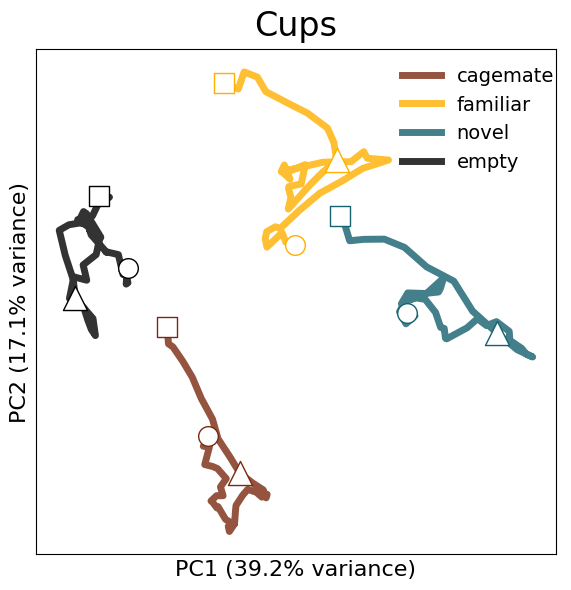

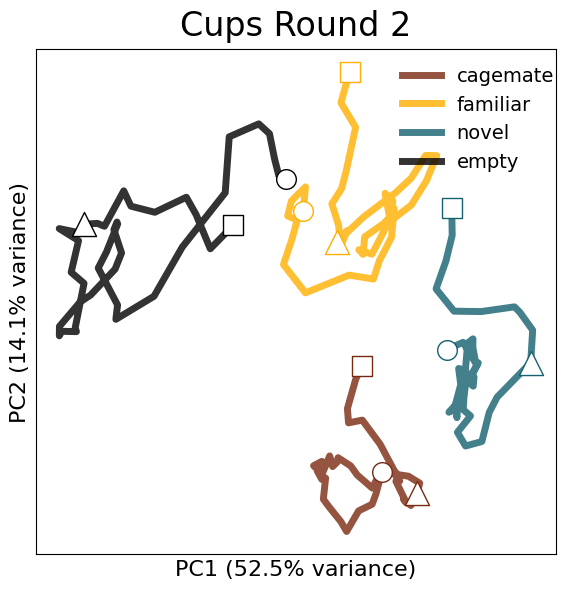

In [19]:
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'familiar': (1.0, 0.6862745098039216, 0.0),
                  'cagemate': hex_2_rgb('#792910')}
plot_pca_results_2d(pca_result=pca_result, title = 'Cups', colors = [hex_2_rgb('#792910'),
                                                             (1.0, 0.6862745098039216, 0.0),
                                                             hex_2_rgb('#15616F'),
                                                             'black'], legend_spot = (0.67, 1))

plot_pca_results_2d(pca_result=pca2result, title = 'Cups Round 2', colors = [hex_2_rgb('#792910'),
                                                              (1.0, 0.6862745098039216, 0.0),
                                                              hex_2_rgb('#15616F'),
                                                              'black'], legend_spot = (0.67, 1))    
#plot_pca_results_3d(pca_result=pca_result, title = 'Cups', colors = [hex_2_rgb('#792910'),
#                                                              (1.0, 0.6862745098039216, 0.0),
#                                                              hex_2_rgb('#15616F'),
#                                                              'black'], azim = 60, elev = 30)                

Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


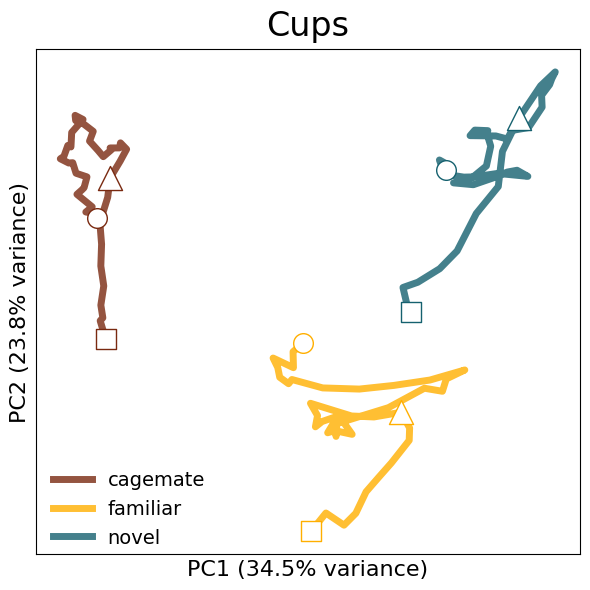

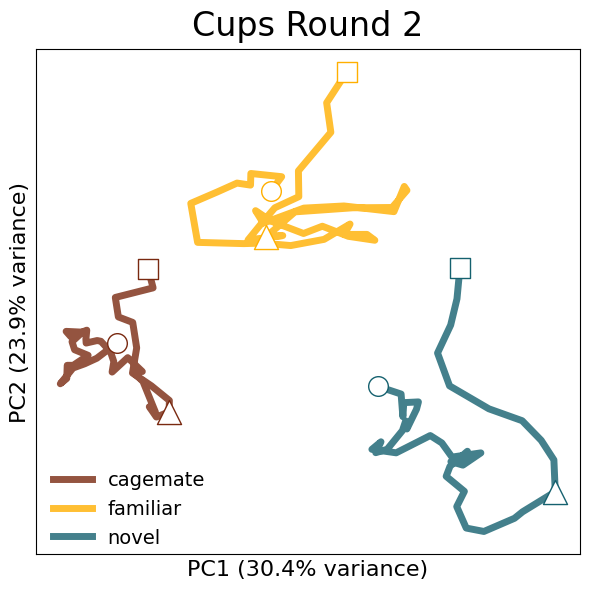

PCA Result with:
Events: cagemate, familiar, novel
Timebins per event: 40.0
Total neurons: 45
Number of recordings: 3
Number of Pcs needed to explain 90% of variance 8


In [20]:
pca_result_no_empty = pca_trajectories.avg_trajectories_pca(cups_collection, event_length = 3, pre_window =1, post_window = 0, min_neurons = 5, events = ['cagemate','familiar','novel'], plot = False)
pca_result_no_empty2 = pca_trajectories.avg_trajectories_pca(cups2_collection, event_length = 3, pre_window =1, post_window = 0, min_neurons = 5, events = ['cagemate','familiar','novel'], plot = False)

str(pca_result_no_empty)
plot_pca_results_2d(pca_result=pca_result_no_empty, title = 'Cups', colors = [hex_2_rgb('#792910'),
                                                             (1.0, 0.6862745098039216, 0.0),
                                                             hex_2_rgb('#15616F'),
                                                             'black'], legend_spot = (0, .2))

plot_pca_results_2d(pca_result=pca_result_no_empty2, title = 'Cups Round 2', colors = [hex_2_rgb('#792910'),            
                                                                (1.0, 0.6862745098039216, 0.0),  
                                                                hex_2_rgb('#15616F'),
                                                                'black'], legend_spot = (0, .2))                   





# plot_pca_results_3d(pca_result=pca_result_no_empty, title = 'Cups', colors = [hex_2_rgb('#792910'),
#                                                              (1.0, 0.6862745098039216, 0.0),
#                                                              hex_2_rgb('#15616F'),
#                                                              'black'], azim = 40, elev = 30)                

print(pca_result_no_empty2)

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


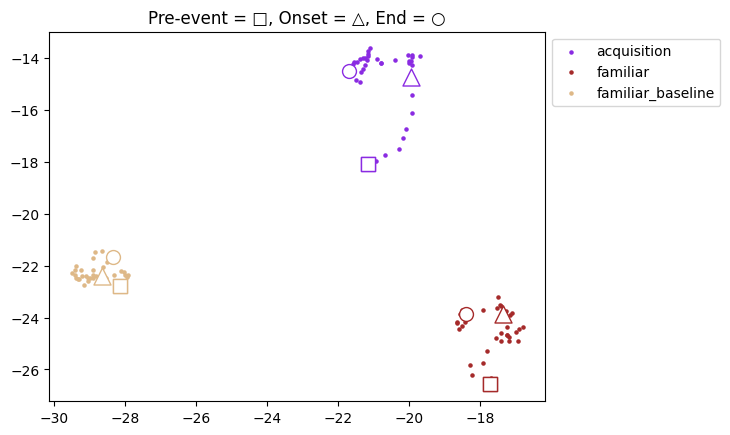

Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


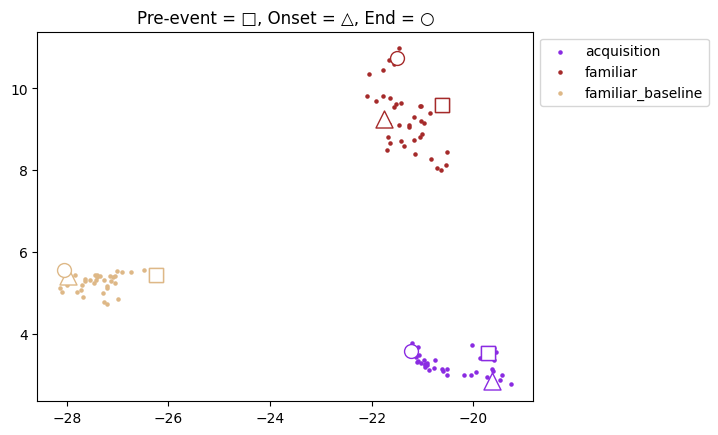

               Recording  Number of Neurons  Number of acquisition events  \
0  41_cups_p8_merged.rec                 19                            31   
1  22_cups_p8_merged.rec                 15                            16   
2  44_cups_p8_merged.rec                 11                            25   

   Number of familiar events  Number of familiar_baseline events  
0                         30                                  51  
1                          7                                  14  
2                          9                                  25  

In [21]:
pca_trajectories.avg_trajectories_pca(cups_collection, events=['acquisition', 'familiar', 'familiar_baseline'], event_length=3, pre_window=1, post_window=0, min_neurons = 5)
pca_trajectories.avg_trajectories_pca(cups2_collection, events=['acquisition', 'familiar', 'familiar_baseline'], event_length=3, pre_window=1, post_window=0, min_neurons = 5)


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


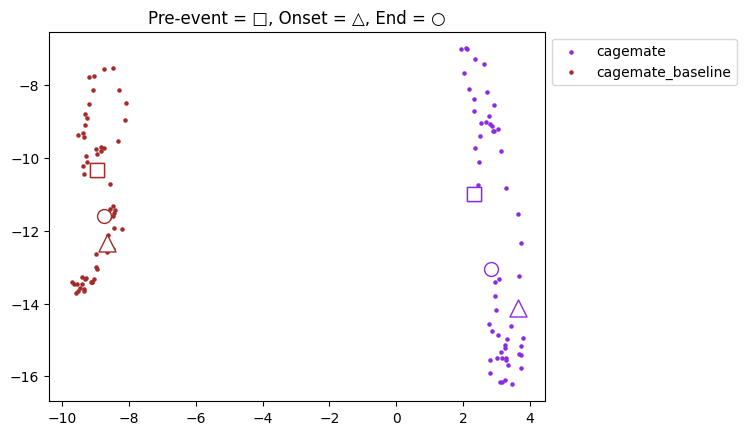

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


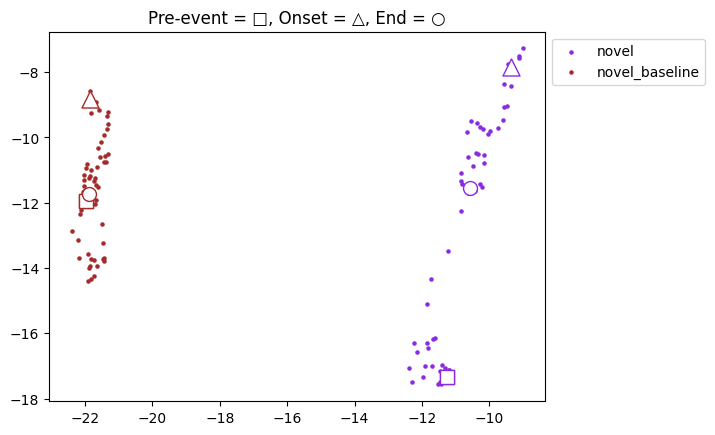

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


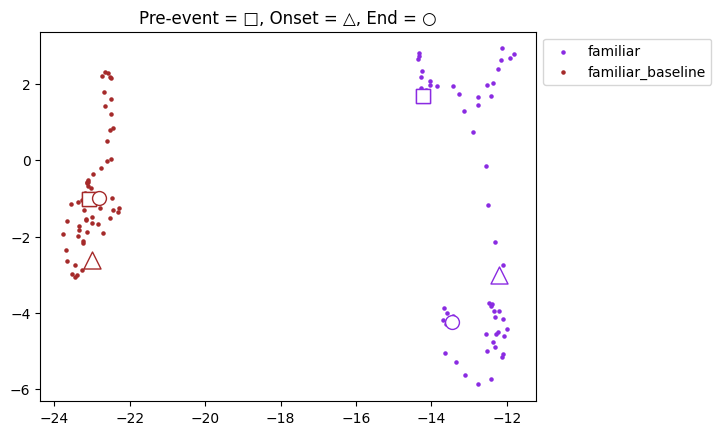

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


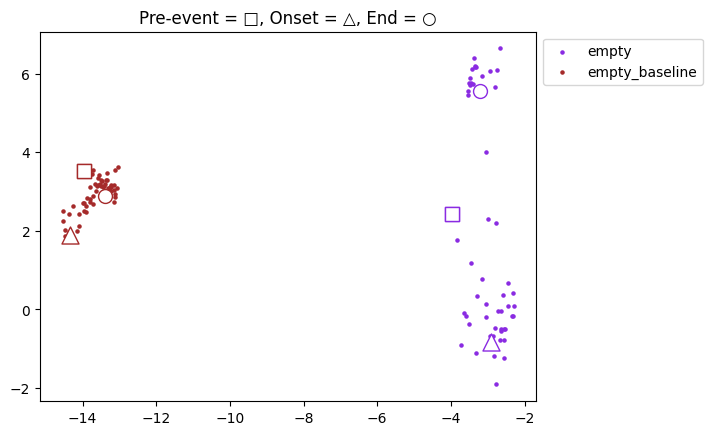

               Recording  Number of Neurons  Number of empty events  \
0  11_cups_p4_merged.rec                 21                      15   
1  41_cups_p4_merged.rec                 18                      24   
2  22_cups_p4_merged.rec                 16                       7   
3  21_cups_p4_merged.rec                 15                      13   
4  13_cups_p4_merged.rec                 12                      30   
5  24_cups_p4_merged.rec                 10                       4   
6  44_cups_p4_merged.rec                 10                       4   
7  32_cups_p4_merged.rec                  7                       1   

   Number of empty_baseline events  
0                               40  
1                               44  
2                               18  
3                               27  
4                               27  
5                               27  
6                               21  
7                               27  

In [22]:
pca_trajectories.avg_trajectories_pca(cups_collection, events=['cagemate', 'cagemate_baseline'], event_length=3, pre_window=3, post_window=0, min_neurons = 5)
pca_trajectories.avg_trajectories_pca(cups_collection, events=['novel', 'novel_baseline'], event_length=3, pre_window=3, post_window=0, min_neurons = 5)
pca_trajectories.avg_trajectories_pca(cups_collection, events=['familiar', 'familiar_baseline'], event_length=3, pre_window=3, post_window=0, min_neurons = 5)
pca_trajectories.avg_trajectories_pca(cups_collection, events=['empty', 'empty_baseline'], event_length=3, pre_window=3, post_window=0, min_neurons = 5)

In [23]:
reload(pca_trajectories)
novel_geo_dist = pca_trajectories.avg_geo_dist(cups_collection, events=events, event_length=3, pre_window=1, percent_var=90, post_window=0, min_neurons = 5)
novel_geo_dist2 = pca_trajectories.avg_geo_dist(cups2_collection, events=events, event_length=3, pre_window=1, percent_var=90, post_window=0, min_neurons = 5)
novel_geo_dist
avg_vals_df = novel_geo_dist.mean()
avg_vals_df

Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\

cagemate_empty       210.855348
cagemate_familiar    190.549232
cagemate_novel       203.703890
empty_familiar       204.548305
empty_novel          225.927871
familiar_novel       233.361851
dtype: float64

In [24]:
def create_comparison_matrix(df):
    # Get unique experiments
    experiments = sorted(list(set([exp for col in df.columns for exp in col.split('_')])))
    n = len(experiments)
    
    # Create empty matrix
    matrix = np.zeros((n, n))
    
    # Fill matrix
    for i, exp1 in enumerate(experiments):
        for j, exp2 in enumerate(experiments):
            if i == j:
                matrix[i,j] = 1
            else:
                col1 = f"{exp1}_{exp2}"
                col2 = f"{exp2}_{exp1}"
                if col1 in df.columns:
                    matrix[i,j] = df[col1].mean()
                elif col2 in df.columns:
                    matrix[i,j] = df[col2].mean()
    
    return pd.DataFrame(matrix, index=experiments, columns=experiments)

def plot_comparison_heatmap(df, title):
    # Create comparison matrix
    matrix = create_comparison_matrix(df)
    
    # Create figure
    plt.figure(figsize=(5, 4))
    
    # Create heatmap
    sns.heatmap(matrix, 
                annot=True, 
                cmap='Blues',
                fmt='.3f',
                square=True,
                cbar_kws={'label': 'AU Distance'},
                vmin = 150)
    
    plt.title(title)
    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\megha\\anaconda3\\envs\\ephys_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

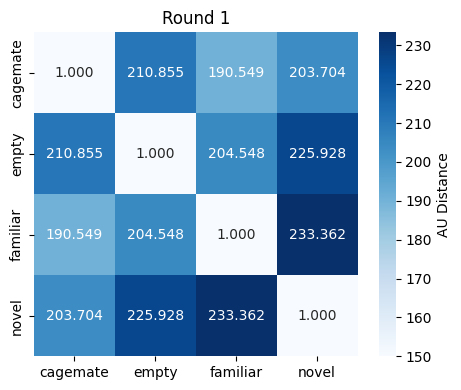

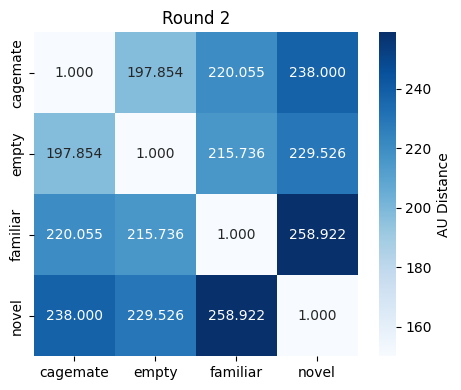

In [25]:
plot_comparison_heatmap(novel_geo_dist, title = 'Round 1')
plot_comparison_heatmap(novel_geo_dist2, title = 'Round 2')


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\

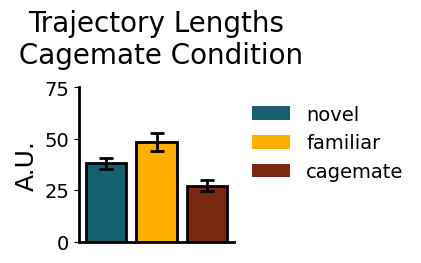

,Comparison,t_statistic,p_value,p_adjusted,significant
0,nov_fam,-2.390352,0.048144,0.091719,False
1,nov_cage,2.423448,0.045859,0.091719,False
2,fam_cage,4.066358,0.004771,0.014313,True


In [26]:
from scipy.spatial.distance import euclidean
from matplotlib.patches import Patch
from statsmodels.stats.multitest import multipletests
import matplotlib.ticker as ticker
events = ['novel','familiar','cagemate']
def trajectory_length(pca_matrix, key):
    trajectory_lengths = []
    event_order = []
    unique_values, counts = np.unique(key, return_counts=True)
    event_len = counts[0]
    for j in range(0, len(key), event_len):
        trajectory_length = 0
        for i in range(event_len-1):
            trajectory_length = trajectory_length + euclidean(
                pca_matrix[j+i, :3],
                pca_matrix[j+i+1, :3])
        trajectory_lengths.append(trajectory_length)
        event_order.append(key[j])
    return [trajectory_lengths, event_order]

trajectory_lengths = []
orders= []
for recording in cups_collection.recordings:
    pc_dict = pca_trajectories.avg_trajectories_pca(recording, event_length = 5, pre_window = 3,
                                                 events = events, min_neurons=5, plot = False)
    if pc_dict:
        [traj_len, event_order] = trajectory_length(pc_dict.transformed_data,
                                                pc_dict.labels)
        trajectory_lengths.append(traj_len)
        orders.append(event_order)
trajectory_lengths = np.array(trajectory_lengths)



means = np.mean(trajectory_lengths, axis = 0)
sems = sem(trajectory_lengths, axis = 0)

t_nov_fam, p_nov_fam = stats.ttest_rel(trajectory_lengths[:,0], trajectory_lengths[:,1])
t_nov_cage, p_nov_cage = stats.ttest_rel(trajectory_lengths[:,0], trajectory_lengths[:,2])
t_fam_cage, p_fam_cage = stats.ttest_rel(trajectory_lengths[:,1], trajectory_lengths[:,2])
p_values = [p_nov_fam, p_nov_cage, p_fam_cage]
reject, p_adjusted, _, _ = multipletests(p_values, method='holm')
stats_df = pd.DataFrame({
   'Comparison': ['nov_fam', 'nov_cage', 'fam_cage'],
   't_statistic': [t_nov_fam, t_nov_cage, t_fam_cage],
   'p_value': p_values,
   'p_adjusted': p_adjusted,
   'significant': reject
})

# Adjust p-values using Holm-Bonferroni
p_values = [p_nov_fam, p_nov_cage, p_fam_cage]
reject, p_adjusted, _, _ = multipletests(p_values, method='holm')
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'familiar': (1.0, 0.6862745098039216, 0.0),
                  'cagemate': hex_2_rgb('#792910')}
hatches = ['','','']  
x = [0.5,1,1.5]
plt.figure(figsize= (2,2))           
plt.bar(x, means, yerr = sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2,
            error_kw={'elinewidth': 2, 'capthick': 2}, 
            width = .4)
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25))
plt.ylim(0,75)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Trajectory Lengths\n Cagemate Condition', fontsize = 20, y = 1.1)
plt.show()

stats_df


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Excluding 32_cups_p8_merged.rec with 4 neurons


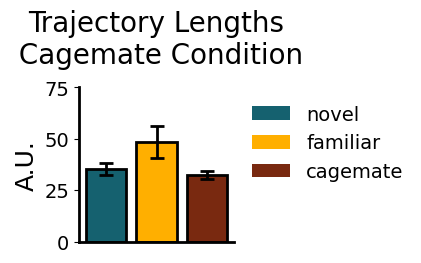

,Comparison,t_statistic,p_value,p_adjusted,significant
0,nov_fam,-1.589000,0.253004,0.381151,False
1,nov_cage,2.988267,0.096112,0.288337,False
2,fam_cage,1.949340,0.190575,0.381151,False


In [27]:
trajectory_lengths = []
orders= []
for recording in cups2_collection.recordings:
    pc_dict = pca_trajectories.avg_trajectories_pca(recording, event_length = 5, pre_window = 3,
                                                 events = events, min_neurons=5, plot = False)
    if pc_dict:
        [traj_len, event_order] = trajectory_length(pc_dict.transformed_data,
                                                pc_dict.labels)
        trajectory_lengths.append(traj_len)
        orders.append(event_order)
trajectory_lengths = np.array(trajectory_lengths)



means = np.mean(trajectory_lengths, axis = 0)
sems = sem(trajectory_lengths, axis = 0)

t_nov_fam, p_nov_fam = stats.ttest_rel(trajectory_lengths[:,0], trajectory_lengths[:,1])
t_nov_cage, p_nov_cage = stats.ttest_rel(trajectory_lengths[:,0], trajectory_lengths[:,2])
t_fam_cage, p_fam_cage = stats.ttest_rel(trajectory_lengths[:,1], trajectory_lengths[:,2])
p_values = [p_nov_fam, p_nov_cage, p_fam_cage]
reject, p_adjusted, _, _ = multipletests(p_values, method='holm')
stats_df = pd.DataFrame({
   'Comparison': ['nov_fam', 'nov_cage', 'fam_cage'],
   't_statistic': [t_nov_fam, t_nov_cage, t_fam_cage],
   'p_value': p_values,
   'p_adjusted': p_adjusted,
   'significant': reject
})

# Adjust p-values using Holm-Bonferroni
p_values = [p_nov_fam, p_nov_cage, p_fam_cage]
reject, p_adjusted, _, _ = multipletests(p_values, method='holm')
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'familiar': (1.0, 0.6862745098039216, 0.0),
                  'cagemate': hex_2_rgb('#792910')}
hatches = ['','','']  
x = [0.5,1,1.5]
plt.figure(figsize= (2,2))           
plt.bar(x, means, yerr = sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2,
            error_kw={'elinewidth': 2, 'capthick': 2}, 
            width = .4)
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25))
plt.ylim(0,75)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Trajectory Lengths\n Cagemate Condition', fontsize = 20, y = 1.1)
plt.show()

stats_df


In [28]:
event_lengths = [6, 5, 2, 5]
events = ['cagemate', 'novel' ,'familiar', 'acquisition']
baseline_window = 2
is_first = True
for i in range(len(events)):
    presniff1_df = single_cell.wilcoxon_collection(cups_collection,
                                             event = events[i],
                                             event_length = event_lengths[i], 
                                             baseline_window = baseline_window,
                                             plot = False)
    presniff2_df = single_cell.wilcoxon_collection(cups2_collection,
                                             event = events[i],
                                             event_length = event_lengths[i], 
                                             baseline_window = baseline_window,
                                             plot = False)                                       
    if is_first:
        merged1_df = presniff1_df
        merged2_df = presniff2_df
        is_first = False
    else:
        suffix = f"_{events[i]}"
        merged1_df = pd.merge(merged1_df, presniff1_df,on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))
        merged2_df = pd.merge(merged2_df, presniff2_df,on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))
      

Wilcoxon can't be done on 22_cups_p4_merged.rec novel, because <6 samples
Wilcoxon can't be done on 11_cups_p4_merged.rec familiar, because <6 samples
Wilcoxon can't be done on 44_cups_p4_merged.rec familiar, because <6 samples


In [29]:

base_columns = ['Subject', 'Recording', 'original unit id']
master1_df = merged1_df[base_columns].copy()
master2_df = merged2_df[base_columns].copy()
# Add comparison columns
for event in events:
   master1_df[f'{event} vs baseline'] = merged1_df[f'event1 vs event2_{event}' if event != 'cagemate' else 'event1 vs event2']
   master2_df[f'{event} vs baseline'] = merged2_df[f'event1 vs event2_{event}' if event != 'cagemate' else 'event1 vs event2']

# Create trimmed version
master1_df_trimmed = master1_df[['original unit id'] + [f'{event} vs baseline' for event in events]]
master2_df_trimmed = master2_df[['original unit id'] + [f'{event} vs baseline' for event in events]]

In [30]:
def group_cells(exp1, exp3, exp4, exp5):
    group = ''
    if (exp1 == 'increases') or (exp1 == 'decreases'):
        group = 'cagemate'
    # if (exp2 == 'increases') or (exp2 == 'decreases'):
    #     group = group + 'exp2' 
    # if (exp3 == 'increases') or (exp3 == 'decreases'):
    #      group = group + 'acquisition'
    if (exp4 == 'increases') or (exp4 == 'decreases'):
        group = group + 'novel'
    if (exp5 == 'increases') or (exp5 == 'decreases'):
        group = group + 'familiar'
    return group

master1_df_trimmed['cell group'] = master1_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
                                                                  #row['exp2 vs baseline'],
                                                                  row['acquisition vs baseline'],
                                                                  row['novel vs baseline'],
                                                                  row['familiar vs baseline']), axis = 1)

master2_df_trimmed['cell group'] = master2_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
                                                                    #row['exp2 vs baseline'],
                                                                    row['acquisition vs baseline'],
                                                                    row['novel vs baseline'],
                                                                    row['familiar vs baseline']), axis = 1)                                 

results1 = master1_df_trimmed.groupby('cell group').count()
results2 = master2_df_trimmed.groupby('cell group').count()
print(results1)
results2

                       original unit id  cagemate vs baseline  \
cell group                                                      
                                     36                    36   
cagemate                             10                    10   
cagematefamiliar                      2                     2   
cagematenovel                         3                     3   
cagematenovelfamiliar                 2                     2   
familiar                              1                     1   
novel                                 7                     7   
novelfamiliar                         1                     1   

                       novel vs baseline  familiar vs baseline  \
cell group                                                       
                                      36                    36   
cagemate                              10                    10   
cagematefamiliar                       2                     2   
cagematenovel      

C:\Users\megha\AppData\Local\Temp\ipykernel_28900\2199530462.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master1_df_trimmed['cell group'] = master1_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
C:\Users\megha\AppData\Local\Temp\ipykernel_28900\2199530462.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2_df_trimmed['cell group'] = master2_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],


,original unit id,cagemate vs baseline,novel vs baseline,familiar vs baseline,acquisition vs baseline
cell group,,,,,
,28,28,28,28,28
cagemate,3,3,3,3,3
cagematefamiliar,3,3,3,3,3
cagematenovel,2,2,2,2,2
cagematenovelfamiliar,1,1,1,1,1
familiar,6,6,6,6,6
novel,6,6,6,6,6


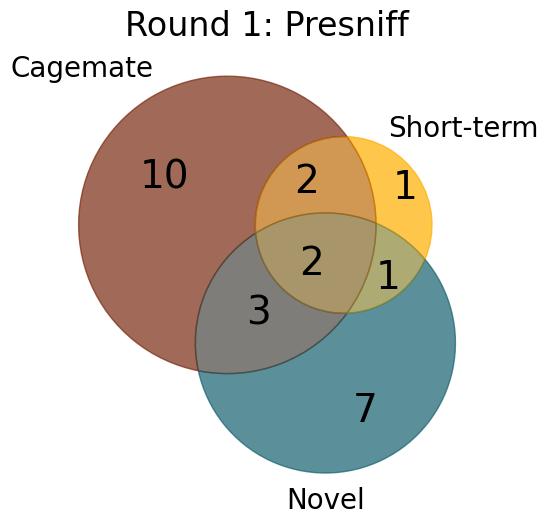

In [31]:
set1 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('cagemate')])
set2 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('familiar')])
set3 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Short-term', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass


    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Round 1: Presniff', fontsize =24)
plt.show()

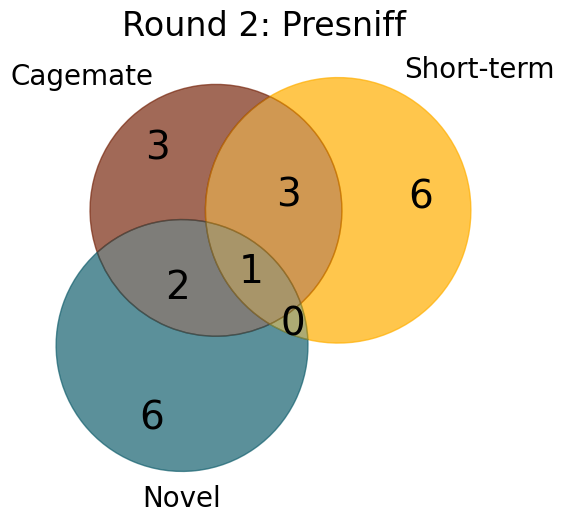

In [32]:
set1 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('cagemate')])
set2 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('familiar')])
set3 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Short-term', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass


    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Round 2: Presniff', fontsize =24)
plt.show()

In [33]:
event_lengths = [6, 5, 2, 5]
events = ['cagemate', 'novel' ,'familiar', 'acquisition']
baselines = ['cagemate_baseline', 'novel_baseline', 'familiar_baseline', 'familiar_baseline']
baseline_window = 2
is_first = True
for i in range(len(events)):
    presniff1_df = single_cell.wilcoxon_event1v2_collection(cups_collection,
                                             event1 = events[i],
                                             event2 = baselines[i],
                                             event_length = event_lengths[i],
                                             pre_window = 0,
                                             plot = False)
    presniff2_df = single_cell.wilcoxon_event1v2_collection(cups2_collection,
                                            event1 = events[i],
                                            event2 = baselines[i],
                                            event_length = event_lengths[i],
                                            pre_window = 0,
                                            plot = False)                                         
    if is_first:
        merged1_df = presniff1_df
        merged2_df = presniff2_df
        is_first = False
    else:
        suffix = f"_{events[i]}"
        merged1_df = pd.merge(merged1_df, presniff1_df,on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))
        merged2_df = pd.merge(merged2_df, presniff2_df,on=['Recording', 'Subject', 'original unit id'], suffixes=('', suffix))                               

Wilcoxon can't be done on 22_cups_p4_merged.rec because <6 samples for either novel or novel_baseline
Wilcoxon can't be done on 11_cups_p4_merged.rec because <6 samples for either familiar or familiar_baseline
Wilcoxon can't be done on 44_cups_p4_merged.rec because <6 samples for either familiar or familiar_baseline


In [34]:

base_columns = ['Subject', 'Recording', 'original unit id']
master1_df = merged1_df[base_columns].copy()
master2_df = merged2_df[base_columns].copy()

# Add comparison columns
for event in events:
   master1_df[f'{event} vs baseline'] = merged1_df[f'event1 vs event2_{event}' if event != 'cagemate' else 'event1 vs event2']
   master2_df[f'{event} vs baseline'] = merged2_df[f'event1 vs event2_{event}' if event != 'cagemate' else 'event1 vs event2']
# Create trimmed version
master1_df_trimmed = master1_df[['original unit id'] + [f'{event} vs baseline' for event in events]]
master2_df_trimmed = master2_df[['original unit id'] + [f'{event} vs baseline' for event in events]]

master1_df_trimmed['cell group'] = master1_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
                                                                  #row['exp2 vs baseline'],
                                                                  row['acquisition vs baseline'],
                                                                  row['novel vs baseline'],
                                                                  row['familiar vs baseline']), axis = 1)
master2_df_trimmed['cell group'] = master2_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
                                                                    #row['exp2 vs baseline'],
                                                                    row['acquisition vs baseline'],
                                                                    row['novel vs baseline'],
                                                                    row['familiar vs baseline']), axis = 1)


results1 = master1_df_trimmed.groupby('cell group').count()
results2 = master2_df_trimmed.groupby('cell group').count()

C:\Users\megha\AppData\Local\Temp\ipykernel_28900\3672267155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master1_df_trimmed['cell group'] = master1_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],
C:\Users\megha\AppData\Local\Temp\ipykernel_28900\3672267155.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2_df_trimmed['cell group'] = master2_df_trimmed.apply(lambda row: group_cells(row['cagemate vs baseline'],


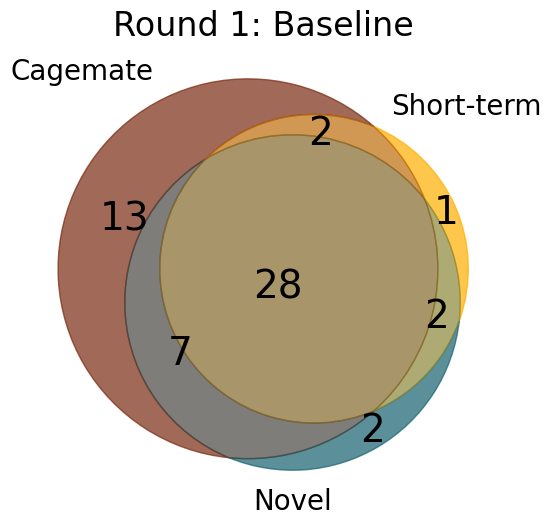

In [35]:
set1 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('cagemate')])
set2 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('familiar')])
set3 = set(master1_df_trimmed.index[master1_df_trimmed['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Short-term', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass


    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Round 1: Baseline', fontsize =24)
plt.show()

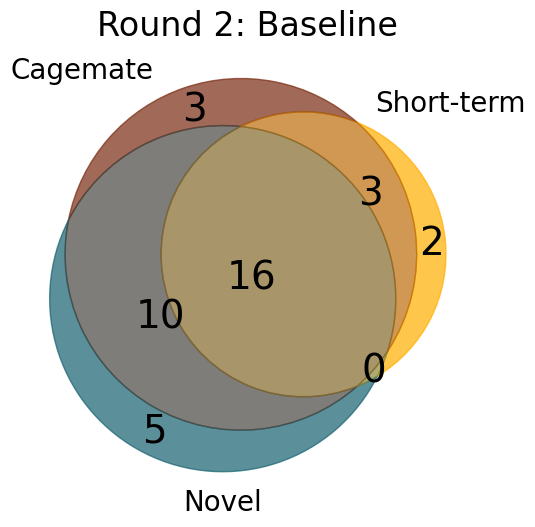

In [36]:
set1 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('cagemate')])
set2 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('familiar')])
set3 = set(master2_df_trimmed.index[master2_df_trimmed['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Short-term', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass


    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Round 2: Baseline', fontsize =24)
plt.show()

In [37]:
reload(single_cell)
#bootstrap_results = single_cell.bootstrap(cups_collection, ['cagemate', 'familiar', 'novel'], 3, pre_window = 0, num_perm = 2000)
bootstrap_results2 = single_cell.bootstrap(cups2_collection, ['cagemate', 'familiar', 'novel'], 3, pre_window = 0, num_perm = 2000)

KeyboardInterrupt: 

In [ ]:

#bootstrap_results.to_csv('pilot2/cups_phase4/output/bootstrap_results.csv')
bootstrap_results = pd.read_csv('pilot2/cups_phase4/output/bootstrap_results.csv')

bootstrap_results2.to_csv('pilot2/cups_phase4/output/bootstrap_results_round2.csv')
#bootstrap_results2 = pd.read_csv('pilot2/cups_phase4/output/bootstrap_results_round2.csv')

In [ ]:

def group_cells(exp1, exp4, exp5):
    group = ''
    if (exp1 == 'significantly increased') or (exp1 == 'significantly decreased'):
        group = 'cagemate'
    # if (exp2 == 'increases') or (exp2 == 'decreases'):
    #     group = group + 'exp2' 
    # if (exp3 == 'increases') or (exp3 == 'decreases'):
    #     group = group + 'exp3'
    if (exp4 == 'significantly increased') or (exp4 == 'significantly decreased'):
        group = group + 'familiar'
    if (exp5 == 'significantly increased') or (exp5 == 'significantly decreased'):
        group = group + 'novel'
    return group

bootstrap_results['cell group'] = bootstrap_results.apply(lambda row: group_cells(row['cagemate'],
                                                                  #row['exp2 vs baseline'],
                                                                  #row['exp3 vs baseline'],
                                                                  row['familiar'],
                                                                  row['novel']), axis = 1)
bootstrap_results2['cell group'] = bootstrap_results2.apply(lambda row: group_cells(row['cagemate'],
                                                                    #row['exp2 vs baseline'],
                                                                    #row['exp3 vs baseline'],
                                                                    row['familiar'],
                                                                    row['novel']), axis = 1)

results = bootstrap_results.groupby('cell group').count()
results2 = bootstrap_results2.groupby('cell group').count()


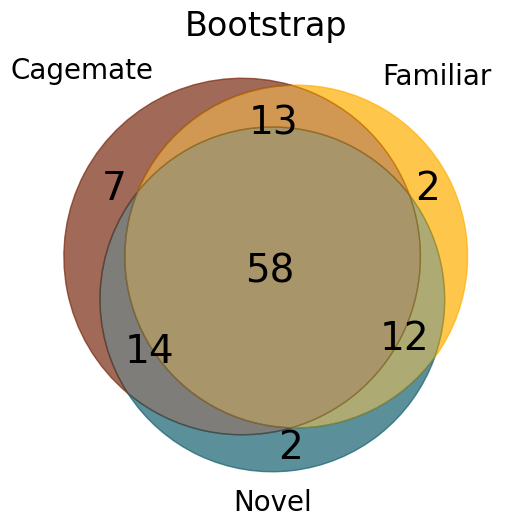

In [ ]:
set1 = set(bootstrap_results.index[bootstrap_results['cell group'].str.contains('cagemate')])
set2 = set(bootstrap_results.index[bootstrap_results['cell group'].str.contains('familiar')])
set3 = set(bootstrap_results.index[bootstrap_results['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Familiar', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass



    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Bootstrap', fontsize =24)
plt.show()

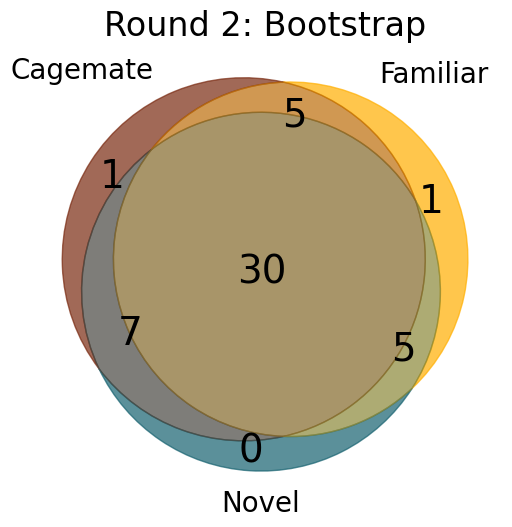

In [ ]:
set1 = set(bootstrap_results2.index[bootstrap_results2['cell group'].str.contains('cagemate')])
set2 = set(bootstrap_results2.index[bootstrap_results2['cell group'].str.contains('familiar')])
set3 = set(bootstrap_results2.index[bootstrap_results2['cell group'].str.contains('novel')])
from matplotlib_venn import venn3

plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Cagemate', 'Familiar', 'Novel'))
try:
   venn.get_patch_by_id('100').set_color('#792910') #exp 1 
   venn.get_patch_by_id('100').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('010').set_color('#FFAF00') #exp 4 
   venn.get_patch_by_id('010').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('001').set_color('#15616F') #exp 5 
   venn.get_patch_by_id('001').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('110').set_color('#bc6c08') # exp 1 + exp 4
   venn.get_patch_by_id('110').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('101').set_color('#474640') #exp1 + 5 
   venn.get_patch_by_id('101').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('011').set_color('#8a8838') # exp 4 and 5 
   venn.get_patch_by_id('011').set_alpha(0.7)
except AttributeError:
   pass

try:
   venn.get_patch_by_id('111').set_color('#84682a') # all
   venn.get_patch_by_id('111').set_alpha(0.7)
except AttributeError:
   pass



    

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Round 2: Bootstrap', fontsize =24)
plt.show()

In [ ]:
values = []
meaning = []
for exposure in ['cagemate', 'familiar']:
    for conditionA in ["significantly increased", "significantly decreased", "not significantly changed"]:
        temp = bootstrap_results[bootstrap_results[exposure] == conditionA]
        for conditionB in ["significantly increased", "significantly decreased", "not significantly changed"]:
            if exposure == 'cagemate':
                values.append(int(temp['familiar'].value_counts()[conditionB]))
                meaning.append(exposure + conditionA + 'exp4' + conditionB) 
            if exposure == 'familiar':
                values.append(temp['novel'].value_counts()[conditionB])
                meaning.append(exposure + conditionA + 'novel' + conditionB) 

In [ ]:
values2 = []
meaning2 = []
for exposure in ['cagemate', 'familiar']:
    for conditionA in ["significantly increased", "significantly decreased", "not significantly changed"]:
        temp = bootstrap_results2[bootstrap_results2[exposure] == conditionA]
        for conditionB in ["significantly increased", "significantly decreased", "not significantly changed"]:
            if exposure == 'cagemate':
                meaning2.append(exposure + conditionA + 'exp4' + conditionB) 
                try:
                    values2.append(int(temp['familiar'].value_counts()[conditionB]))
                except KeyError:
                    values2.append(0)
            if exposure == 'familiar':
                meaning2.append(exposure + conditionA + 'novel' + conditionB)
                try:
                    values2.append(temp['novel'].value_counts()[conditionB])
                except KeyError:
                    values2.append(0)
                     
            

In [ ]:
print

<function print>

In [ ]:
import plotly.graph_objects as go
print(len(values))
print(len(values2))

18
18


In [ ]:
names = ["significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change"]
targets = ["significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change",
                "significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change"]
color_dict = {'increased':'red','decreased':'blue','change':'grey'}
color_dict_links = {"increased":"#FFDCDC", 'decreased': "#DCE5FF", 'change':  "#DBDBDB"}
fig = go.Figure(data=[go.Sankey(
    node = dict(
        label = names,             # Third stage
        pad = 15,
        thickness = 20,
        color = [color_dict[x.split(' ')[-1]] for x in names],
         y = [0.15, 0.49, 0.85,     # First stage (A_1, B_1, C_1)
            0.18, 0.51, 0.84,     # Second stage (A_2, B_2, C_2) 
            0.18, 0.55, 0.88],    # Third stage (A_3, B_3, C_3)
       # x positions to space out stages
        x = [0.1, 0.1, 0.1,       # First stage
            0.5, 0.5, 0.5,       # Second stage
            0.9, 0.9, 0.9] 
    ),
    link = dict(
        # First stage to second stage
        source = [0, 0, 0,          # Math101 to Pass/Fail
                 1, 1, 1,
                 2, 2, 2,
                 3, 3, 3, 
                 4, 4, 4, 
                 5, 5, 5],          # Physics101 to Pass/Fail
        target = [3, 4, 5,          # to Pass Math/Fail Math
                 3, 4, 5,
                 3, 4, 5,
                 6, 7, 8,
                 6, 7, 8,
                 6, 7, 8],          # to Pass Physics/Fail Physics
        value = values,  
        color = [color_dict_links[x.split(' ')[-1]] for x in targets],
         
      
               # 70 pass physics, 30 fail
    )
)])
fig.update_layout(
    annotations=[
        # First group title
        dict(
            x=-0.05,  # x position (0 to 1)
            y=1.1,  # y position above the plot
            xref="paper",
            yref="paper",
            text="Cagemate",
            showarrow=False,
            font=dict(size=16)
        ),
        # Second group title
        dict(
            x=0.5,
            y=1.1,
            xref="paper",
            yref="paper",
            text="Familiar",
            showarrow=False,
            font=dict(size=16)
        ),
        # Third group title
        dict(
            x=1.05,
            y=1.1,
            xref="paper",
            yref="paper",
            text="Novel",
            showarrow=False,
            font=dict(size=16)
        ),
        # dict(
        #     x=.5,
        #     y=1.3,
        #     xref="paper",
        #     yref="paper",
        #     text="Novel",
        #     showarrow=False,
        #     font=dict(size=24)
        # )
    ],
    # Add more top margin to make room for labels
    margin=dict(t=100)
)

fig.show()

In [ ]:
names = ["significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change"]
targets = ["significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change",
                "significantly increased", "significantly decreased", "no change",           # First stage
                "significantly increased", "significantly decreased", "no change",  
                " significantly increased", " significantly decreased", " no change"]
color_dict = {'increased':'red','decreased':'blue','change':'grey'}
color_dict_links = {"increased":"#FFDCDC", 'decreased': "#DCE5FF", 'change':  "#DBDBDB"}
fig = go.Figure(data=[go.Sankey(
    node = dict(
        label = names,             # Third stage
        pad = 15,
        thickness = 20,
        color = [color_dict[x.split(' ')[-1]] for x in names],
         y = [0.15, 0.49, 0.85,     # First stage (A_1, B_1, C_1)
            0.18, 0.51, 0.84,     # Second stage (A_2, B_2, C_2) 
            0.18, 0.55, 0.88],    # Third stage (A_3, B_3, C_3)
       # x positions to space out stages
        x = [0.1, 0.1, 0.1,       # First stage
            0.5, 0.5, 0.5,       # Second stage
            0.9, 0.9, 0.9] 
    ),
    link = dict(
        # First stage to second stage
        source = [0, 0, 0,          # Math101 to Pass/Fail
                 1, 1, 1,
                 2, 2, 2,
                 3, 3, 3, 
                 4, 4, 4, 
                 5, 5, 5],          # Physics101 to Pass/Fail
        target = [3, 4, 5,          # to Pass Math/Fail Math
                 3, 4, 5,
                 3, 4, 5,
                 6, 7, 8,
                 6, 7, 8,
                 6, 7, 8],          # to Pass Physics/Fail Physics
        value = values2,  
        color = [color_dict_links[x.split(' ')[-1]] for x in targets],
         
      
               # 70 pass physics, 30 fail
    )
)])
fig.update_layout(
    annotations=[
        # First group title
        dict(
            x=-0.05,  # x position (0 to 1)
            y=1.1,  # y position above the plot
            xref="paper",
            yref="paper",
            text="Cagemate",
            showarrow=False,
            font=dict(size=16)
        ),
        # Second group title
        dict(
            x=0.5,
            y=1.1,
            xref="paper",
            yref="paper",
            text="Familiar",
            showarrow=False,
            font=dict(size=16)
        ),
        # Third group title
        dict(
            x=1.05,
            y=1.1,
            xref="paper",
            yref="paper",
            text="Novel",
            showarrow=False,
            font=dict(size=16)
        ),
        # dict(
        #     x=.5,
        #     y=1.3,
        #     xref="paper",
        #     yref="paper",
        #     text="Novel",
        #     showarrow=False,
        #     font=dict(size=24)
        # )
    ],
    # Add more top margin to make room for labels
    margin=dict(t=100)
)

fig.show()

In [ ]:
print(values)
print(values2)

[24, 4, 8, 13, 30, 13, 5, 9, 3, 27, 10, 5, 8, 25, 10, 9, 7, 8]
[15, 3, 2, 4, 13, 6, 5, 1, 0, 15, 5, 4, 2, 13, 2, 3, 4, 1]


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



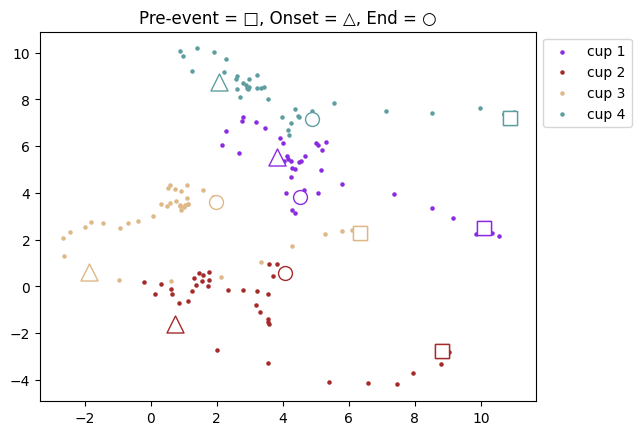

Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



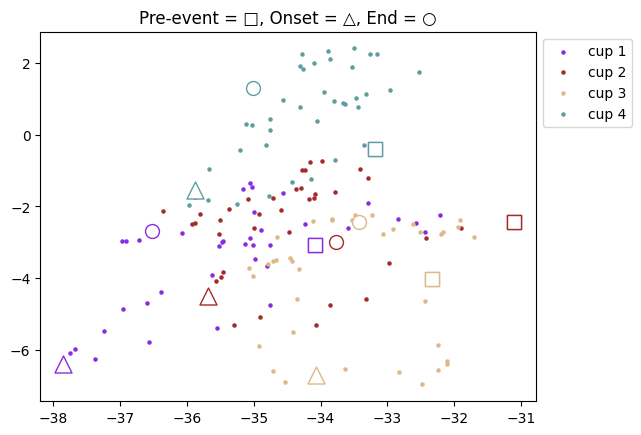

               Recording  Number of Neurons  Number of cup 1 events  \
0  11_cups_p4_merged.rec                 21                      17   
1  41_cups_p4_merged.rec                 18                      33   
2  22_cups_p4_merged.rec                 16                      18   
3  21_cups_p4_merged.rec                 15                      25   
4  13_cups_p4_merged.rec                 12                      27   
5  24_cups_p4_merged.rec                 10                      14   
6  44_cups_p4_merged.rec                 10                      22   
7  32_cups_p4_merged.rec                  7                      31   

   Number of cup 2 events  Number of cup 3 events  Number of cup 4 events  
0                      19                      33                      40  
1                      30                      31                      44  
2                      25                      19                      28  
3                      28                      25       

In [ ]:
location_pca = pca_trajectories.avg_trajectories_pca(cups_collection, 3, 1, events = ['cup 1', 'cup 2', 'cup 3' , 'cup 4'], min_neurons = 5)
location2_pca = pca_trajectories.avg_trajectories_pca(cups2_collection, 3, 1, events = ['cup 1', 'cup 2', 'cup 3' , 'cup 4'], min_neurons = 5)
location_pca

In [ ]:
print(str(location2_pca))

PCA Result with:
Events: cup 1, cup 2, cup 3, cup 4
Timebins per event: 40.0
Total neurons: 45
Number of recordings: 3
Number of Pcs needed to explain 90% of variance 10


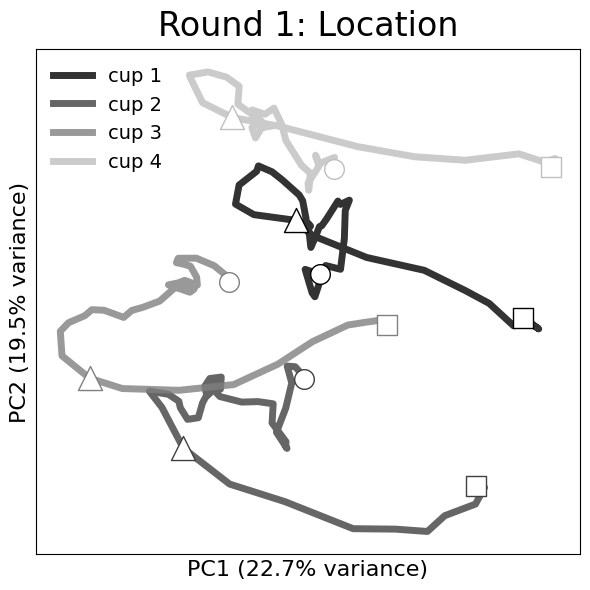

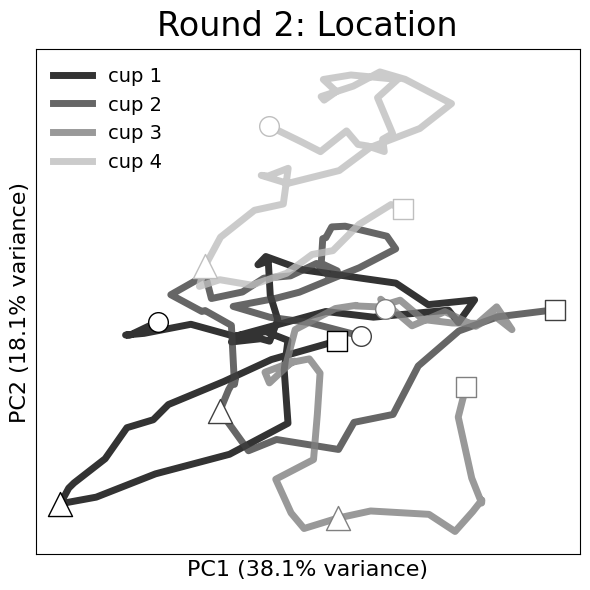

In [ ]:
plot_pca_results_2d(location_pca,
                    title = "Round 1: Location",
                    colors = ['#000000', '#404040', '#808080', '#BFBFBF'],
                    legend_spot = (0,1))
plot_pca_results_2d(location2_pca,
                    title = "Round 2: Location",
                    colors = ['#000000', '#404040', '#808080', '#BFBFBF'],
                    legend_spot = (0,1))                    
# plot_pca_results_3d(location_pca,
#                     title = "Location",
#                     colors = ['#000000', '#404040', '#808080', '#BFBFBF'],
#                    azim = 40, elev = 30)



SpikeCollection Summary:
  Number of Recordings: 8
  Average Number of Good Units: 15.00
  Average Number of Events per Event Type: {'cup 1': 23.5, 'cup 2': 25.375, 'cup 3': 32.0, 'cup 4': 29.625, 'acquisition': 29.375, 'empty acquisition': 63.25, 'familiar': 11.25, 'familiar_baseline': 25.75, 'cagemate_baseline': 25.5, 'novel_baseline': 30.25, 'empty_baseline': 29.0, 'novel': 19.375, 'cagemate': 32.0, 'empty': 12.375, 'pink': 24.375, 'orange': 29.875, 'blue': 26.625, 'green': 35.125}
  Number of Unique Subjects: 8


SpikeCollection Summary:
  Number of Recordings: 4
  Average Number of Good Units: 14.00
  Average Number of Events per Event Type: {'cup 1': 20.25, 'cup 2': 24.75, 'cup 3': 24.0, 'cup 4': 26.25, 'acquisition': 26.0, 'empty acquisition': 46.25, 'familiar': 14.0, 'novel': 16.5, 'cagemate': 23.5, 'empty': 10.75, 'cagemate_baseline': 20.0, 'familiar_baseline': 27.5, 'novel_baseline': 24.75, 'empty_baseline': 23.0, 'pink': 26.0, 'orange': 23.0, 'blue': 17.75, 'green': 28.5}
  

In [81]:
import spike.spike_analysis.decoders as decoders
reload(decoders)
pre_window = 1
event_length = 3
num_folds = 5
min_neurons = 5
events = ['cagemate','novel','familiar']

agent_decoder_results = decoders.trial_decoder(cups_collection,
                                         num_fold=num_folds,
                                         no_PCs=10,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)      
                                         
agent_decoder_results_r2 = decoders.trial_decoder(cups2_collection,
                                         num_fold=num_folds,
                                         no_PCs=8,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)                                      


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [82]:
from matplotlib.patches import Patch
def plot_decoder_results(decoder, title, color_list, legend_titles, figsize, start=0, stop=None, ):
    bar_width = 0.2
    plt.figure(figsize=figsize)
    
    bar_position = 0  # Starting position for bars
    bar_centers = []  # Store center positions for labels
    j = 0
    
    # First, create bars without labels
    for key, results in decoder.results.items():
        
        total_event = decoder.event_length + decoder.post_window
        x = np.linspace(-decoder.pre_window, total_event, np.array(results.roc_auc).shape[0])
        
        if start is not None:
            plot_start = np.where(x >= start)[0][0]
        if stop is None:
            plot_stop = results.roc_auc.shape[0]
        if stop is not None:
            plot_stop = np.where(x <= stop)[0][-1] + 1
            
        rf_avg = np.mean(np.mean(results.roc_auc[start:stop], axis=0), axis=0)
        rf_sem = sem(np.mean(results.roc_auc[plot_start:plot_stop], axis=0))
        rf_shuffle_avg = np.mean(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0), axis=0)
        rf_shuffle_sem = sem(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0))
        
        # Plot bars without labels
        plt.bar(bar_position, rf_avg, bar_width, 
               yerr=rf_sem, capsize=5, color=color_list[j], 
               edgecolor='black', linewidth=2,
               error_kw={'elinewidth': 2, 'capthick': 2})
        plt.bar(bar_position + bar_width, rf_shuffle_avg, bar_width, 
               yerr=rf_shuffle_sem, capsize=5, color=color_list[j], 
               hatch='//', edgecolor='black', linewidth=2,
               error_kw={'elinewidth': 2, 'capthick': 2})
        
        # Store center position for this pair of bars
        bar_centers.append(bar_position + bar_width/2)
        
        bar_position += 0.6
        j += 1
    
    # Add centered labels under each pair of bars
    plt.xticks(bar_centers, legend_titles, fontsize=12)
    
    # Create custom legend for RF and RF Shuffle
    legend_elements = [
    Patch(facecolor='grey', edgecolor='black', linewidth=2, label='RF'),
    Patch(facecolor='grey', edgecolor='black', linewidth=2, hatch='///', label='RF Shuffle')
    ]

    # Create the legend with modified properties
    leg = plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1), 
                    frameon=False, fontsize=16)

# Adjust the size of the patches in the legend
    for patch in leg.get_patches():
        patch.set_height(15)  # Adjust this value to change height
        patch.set_y(0)
        patch.set_width(15) 
        patch.set_x(20)
    
    plt.ylim(0.4, 1)
    plt.ylabel('AUC', fontsize=18)
    plt.xticks(fontsize = 14)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.title(title, fontsize=20, y = 1.1)
    plt.yticks(fontsize=14)
    plt.show()


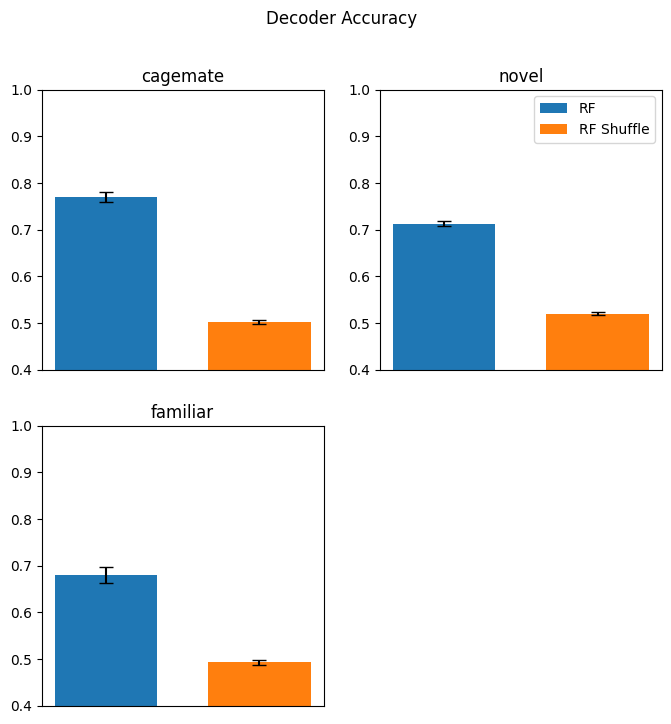

In [83]:
agent_decoder_results.plot_average()

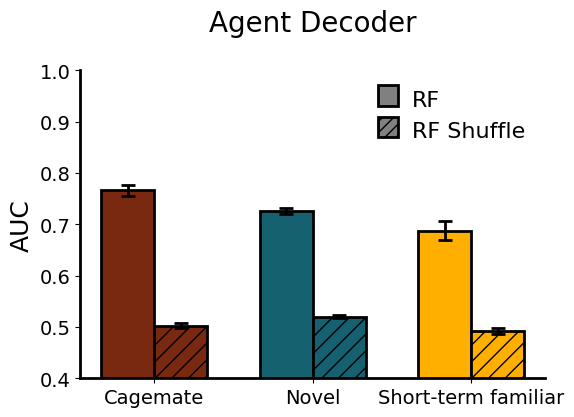

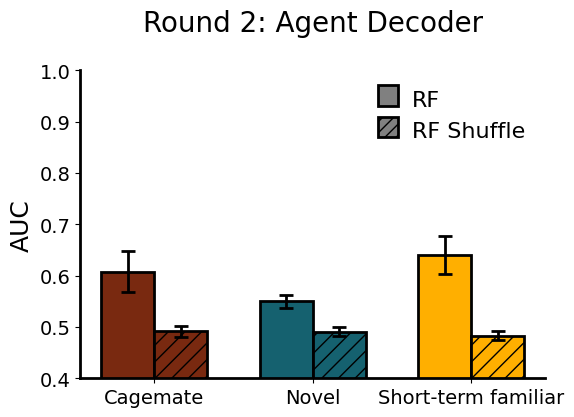

In [84]:
plot_decoder_results(agent_decoder_results, title = "Agent Decoder", color_list = [hex_2_rgb('#792910'),
                                                                                   hex_2_rgb('#15616F'),
                                                                                   (1.0, 0.6862745098039216, 0.0)],
                     start = 0, stop = 3,
                     legend_titles = ['Cagemate', 'Novel', 'Short-term familiar'], figsize = (6,4))
plot_decoder_results(agent_decoder_results_r2, title = "Round 2: Agent Decoder", color_list = [hex_2_rgb('#792910'),
                                                                                   hex_2_rgb('#15616F'),
                                                                                   (1.0, 0.6862745098039216, 0.0)],
                     start = 0, stop = 3,
                     legend_titles = ['Cagemate', 'Novel', 'Short-term familiar'], figsize = (6,4))
                                                                                                                       

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


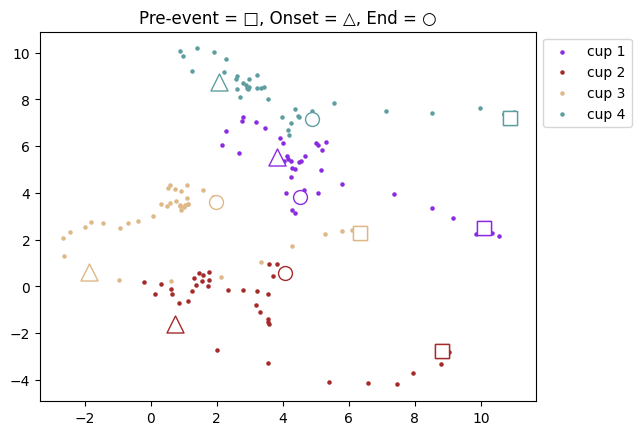

PCA Result with:
Events: cup 1, cup 2, cup 3, cup 4
Timebins per event: 40.0
Total neurons: 109
Number of recordings: 8
Number of Pcs needed to explain 90% of variance 14
Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


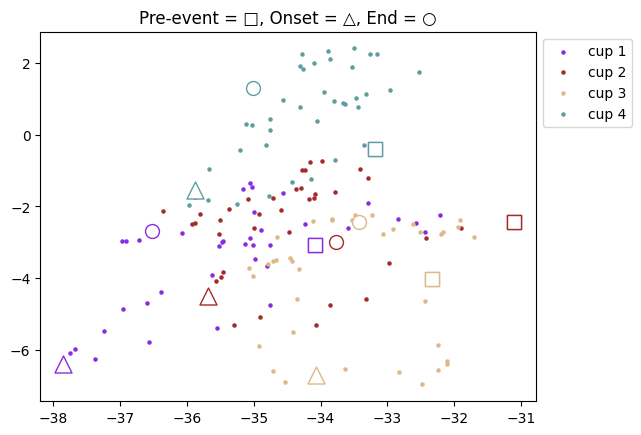

PCA Result with:
Events: cup 1, cup 2, cup 3, cup 4
Timebins per event: 40.0
Total neurons: 45
Number of recordings: 3
Number of Pcs needed to explain 90% of variance 10


In [85]:
location_pca = pca_trajectories.avg_trajectories_pca(cups_collection, 3, 1, events = ['cup 1', 'cup 2', 'cup 3' , 'cup 4'], min_neurons = 5)
print(str(location_pca))

location_pca2 = pca_trajectories.avg_trajectories_pca(cups2_collection, 3, 1, events = ['cup 1', 'cup 2', 'cup 3' , 'cup 4'], min_neurons = 5)
print(str(location_pca2))

In [86]:
pre_window = 1
event_length = 3
num_folds = 5
min_neurons = 5
events = ['cup 1', 'cup 2','cup 3','cup 4']

location_decoder_results = decoders.trial_decoder(cups_collection,
                                         num_fold=num_folds,
                                         no_PCs=14,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)      

location_decoder_results2 = decoders.trial_decoder(cups2_collection,
                                         num_fold=num_folds,
                                         no_PCs=10,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)   

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


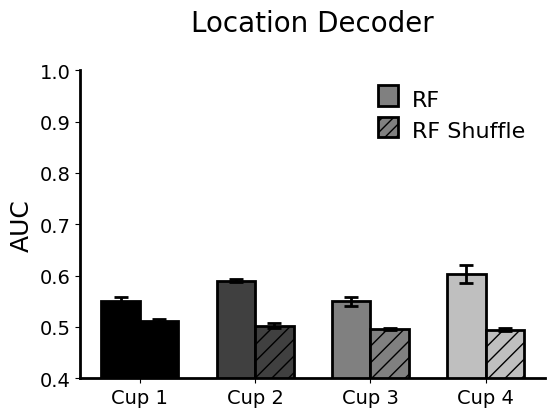

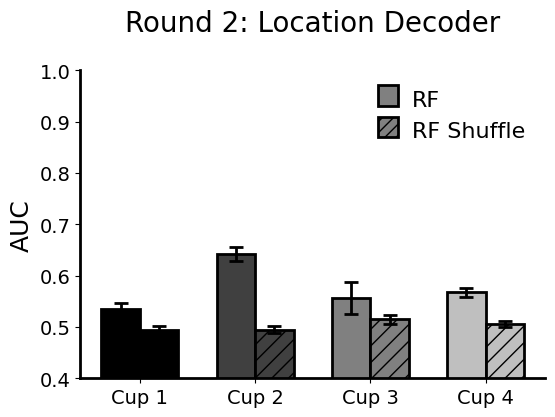

In [87]:
plot_decoder_results(location_decoder_results, title = "Location Decoder", color_list = ['#000000', '#404040', '#808080', '#BFBFBF'],                                                       
                     start = 0, stop = 3,
                     legend_titles = ['Cup 1', 'Cup 2', 'Cup 3', 'Cup 4'], figsize = (6,4))
plot_decoder_results(location_decoder_results2, title = "Round 2: Location Decoder", color_list = ['#000000', '#404040', '#808080', '#BFBFBF'],                                                       
                     start = 0, stop = 3,
                     legend_titles = ['Cup 1', 'Cup 2', 'Cup 3', 'Cup 4'], figsize = (6,4))

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


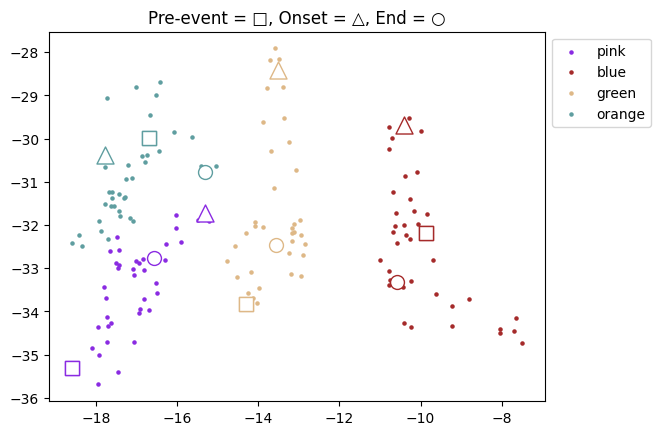

PCA Result with:
Events: pink, blue, green, orange
Timebins per event: 40.0
Total neurons: 109
Number of recordings: 8
Number of Pcs needed to explain 90% of variance 19
Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


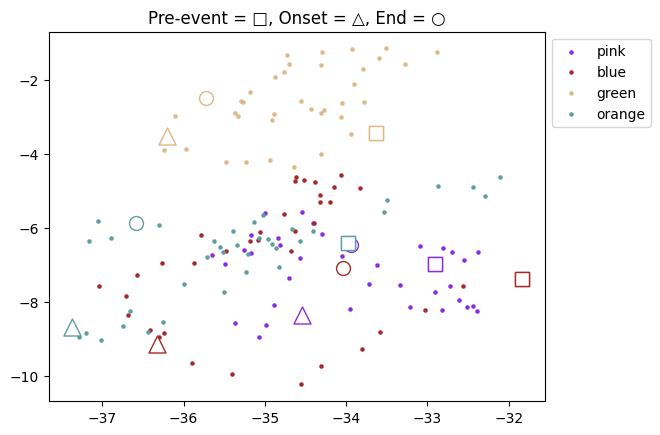

PCA Result with:
Events: pink, blue, green, orange
Timebins per event: 40.0
Total neurons: 45
Number of recordings: 3
Number of Pcs needed to explain 90% of variance 10


In [89]:
color_pca = pca_trajectories.avg_trajectories_pca(cups_collection, 3, 1, events = ['pink', 'blue','green','orange'], min_neurons = 5)
print(str(color_pca))

color_pca2 = pca_trajectories.avg_trajectories_pca(cups2_collection, 3, 1, events = ['pink', 'blue','green','orange'], min_neurons = 5)
print(str(color_pca2))


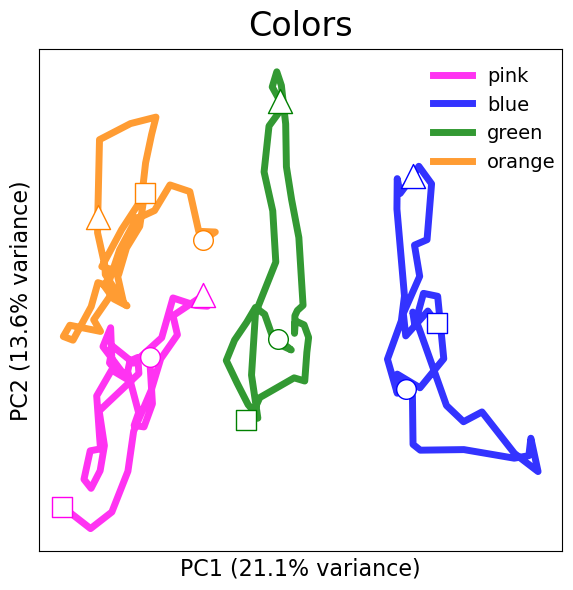

In [ ]:
plot_pca_results_2d(color_pca, title = 'Colors',colors = ['#ff00ef', 'blue', 'green', '#FF8300'], legend_spot = (.72,1) )

In [90]:
pre_window = 1
event_length = 3
num_folds = 5
min_neurons = 5
events = ['pink', 'blue','green','orange']

color_decoder_results = decoders.trial_decoder(cups_collection,
                                         num_fold=num_folds,
                                         no_PCs=19,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)   
color_decoder_results2 = decoders.trial_decoder(cups2_collection,
                                         num_fold=num_folds,
                                         no_PCs=10,
                                         events =events,
                                         event_length = event_length,
                                         pre_window = pre_window,
                                         min_neurons = 5)   

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Excluding 32_cups_p8_merged.rec with 4 neurons


c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


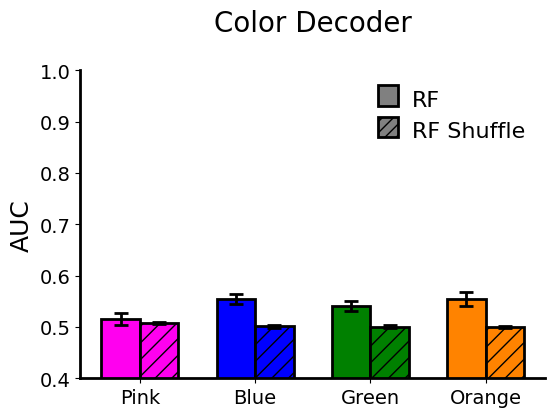

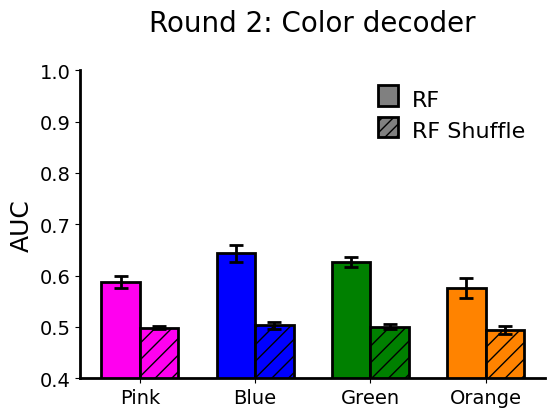

In [92]:
plot_decoder_results(color_decoder_results, title = "Color Decoder", color_list = ['#ff00ef', 'blue', 'green', '#FF8300'],                                                       
                     start = 0, stop = 3,
                     legend_titles = ['Pink', 'Blue', 'Green', 'Orange'], figsize = (6,4))
plot_decoder_results(color_decoder_results2, title = "Round 2: Color decoder", color_list = ['#ff00ef', 'blue', 'green', '#FF8300'],                                                       
                     start = 0, stop = 3,
                     legend_titles = ['Pink', 'Blue', 'Green', 'Orange'], figsize = (6,4))